In [ ]:
# Installing libraries
!python -m pip install basemap
!pip install geodatasets
!pip install dash
!pip install 'dask[complete]'
! pip install --upgrade numpy
! pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.4/942.4 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 82.9 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.1
    Uninstalling pyproj-3.7.1:
      Successfully uninstalled pyproj-3.7.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstall

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import time
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import dash
from dash import Dash, html
from matplotlib.ticker import MultipleLocator
import dask.array as da
import dask.bag as db
import dask.dataframe as dd
import calendar
import matplotlib

In [ ]:
# Mount the Google Drive at /content/drive
drive.mount('/content/drive')

In [ ]:
# Explanation of columns
# lat/lon - coordinate of fire events
# Brightness = channel brightness temperature of the fire pixel measured in Kelvin.
# scan = along scan pixel size
# track = along track pixel size
# "Scan" and "track" values provide information about the actual spatial resolution of the detected fire pixel, which can vary depending on its location within the sensor's field of view.
# confidence = l low, n nominal, h high
# version = collection and soure version
# bright_t31 = I-5 Channel brightness temperature of the fire pixel measured in Kelvin.
# FRP - fire radiative power
# acq date/time, date and time of the acquisition. Time in UTC
# type = 0 presumed vegetation fire, 1 active volcano, 2 other static land source, 3 offshore detection - only available for standard quality data
# frp brightness ratio - calculated ratio of frp brightness
# Further information can be found here https://firms.modaps.eosdis.nasa.gov/descriptions/FIRMS_VIIRS_Firehotspots.html

# difference between Brightness and bright t_31 - brightness is i4 which is in the mid infrared spectral region
# i5 is a slightly different wavelength, and provides complementary information to i4

# Weather data
# Eastward and northward wind - m/s, wind direction and speed
# Temperature - air temperature in Kelvin

# Terrain data
#elevation in metres
# Slope - terrain gradient in degrees
# Aspect - direction of gradient, 0 North, 90 East, 180 South, 270 West


In [ ]:
# Load the dataset from Drive
fire_weather_terrain = pd.read_csv('/content/drive/MyDrive/0.Data science final project/5. Fire weather terrain combined/fire_weather_terrain.csv')

In [ ]:
fire_weather_terrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465195 entries, 0 to 465194
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   latitude              465195 non-null  float64
 1   longitude             465195 non-null  float64
 2   brightness            465195 non-null  float64
 3   scan                  465195 non-null  float64
 4   track                 465195 non-null  float64
 5   date                  465195 non-null  object 
 6   satellite             465195 non-null  object 
 7   instrument            465195 non-null  object 
 8   confidence            465195 non-null  object 
 9   bright_t31            465195 non-null  float64
 10  frp                   465195 non-null  float64
 11  daynight              465195 non-null  object 
 12  type                  465195 non-null  object 
 13  frp_brightness_ratio  465195 non-null  float64
 14  day_of_week           465195 non-null  object 
 15  

In [ ]:
fire_weather_terrain.describe()

,latitude,longitude,brightness,scan,track,bright_t31,frp,frp_brightness_ratio,time,scaled_date,era5_eastward_wind,era5_northward_wind,era5_temperature,terrain_elevation,terrain_slope,terrain_aspect
count,465195.000000,465195.000000,465195.000000,465195.000000,465195.000000,465195.000000,465195.000000,465195.000000,465195.000000,465195.000000,465195.000000,465195.000000,465195.000000,465195.000000,465195.000000,465195.000000
mean,41.904019,-118.856353,326.680010,0.548590,0.539194,292.467901,22.033309,0.061501,13.746689,1724.954896,0.481307,0.266097,289.523386,1280.993814,15.076948,181.489352
std,4.358952,3.033270,22.496365,0.391698,0.233683,13.857545,97.959174,0.231083,5.563892,5.090284,1.476819,1.277596,8.375937,735.868942,10.716468,93.050267
min,32.001000,-124.748940,207.380000,0.320000,0.360000,240.050000,0.000000,0.000000,3.000000,1710.028800,-7.291274,-6.978286,257.505365,-81.786430,0.344337,0.000000
25%,38.882995,-121.735820,306.410000,0.400000,0.380000,284.070000,1.820000,0.005873,9.000000,1722.038400,-0.717585,-0.459377,283.401147,730.019843,5.374043,104.346358
50%,43.576810,-118.745200,326.980000,0.450000,0.460000,289.790000,4.680000,0.014203,10.000000,1724.803200,0.387181,0.209544,288.970074,1322.000000,13.683711,181.976951
75%,45.001810,-115.762250,342.960000,0.530000,0.610000,298.860000,13.850000,0.040598,20.000000,1727.740800,1.650006,0.970092,295.432742,1871.153735,23.086628,259.922811
max,48.999750,-114.000910,509.500000,4.800000,2.000000,400.100000,11759.600000,23.519200,23.000000,1741.478400,7.526271,8.620921,318.907337,3441.245946,66.010110,359.525680


In [ ]:
fire_weather_terrain.head()

,latitude,longitude,brightness,scan,track,date,satellite,instrument,confidence,bright_t31,...,frp_brightness_ratio,day_of_week,time,scaled_date,era5_eastward_wind,era5_northward_wind,era5_temperature,terrain_elevation,terrain_slope,terrain_aspect
0,48.62248,-123.53745,315.41,0.39,0.36,2024-03-12,SUOMI,VIIRS,n,276.92,...,0.005200,Tuesday,10,1710.2016,0.238112,1.836057,278.236472,141.053091,17.995291,277.745056
1,48.46122,-124.04675,336.03,0.39,0.36,2024-03-15,SUOMI,VIIRS,n,289.20,...,0.012975,Friday,20,1710.4608,-2.302568,-0.722024,282.733589,499.959241,11.635393,189.708092
2,48.46284,-124.04449,331.22,0.39,0.36,2024-03-15,SUOMI,VIIRS,n,290.66,...,0.010869,Friday,20,1710.4608,-2.337032,-0.728638,282.728811,534.427533,10.487661,189.553949
3,47.21657,-123.03061,326.83,0.39,0.36,2024-03-18,SUOMI,VIIRS,n,278.20,...,0.007037,Monday,10,1710.7200,0.260060,-1.021459,279.411684,41.047428,1.491172,29.854566
4,48.45983,-124.04285,333.52,0.47,0.48,2024-03-18,SUOMI,VIIRS,n,291.09,...,0.009445,Monday,21,1710.7200,-0.550469,0.047243,283.462244,481.502214,7.948330,237.428700


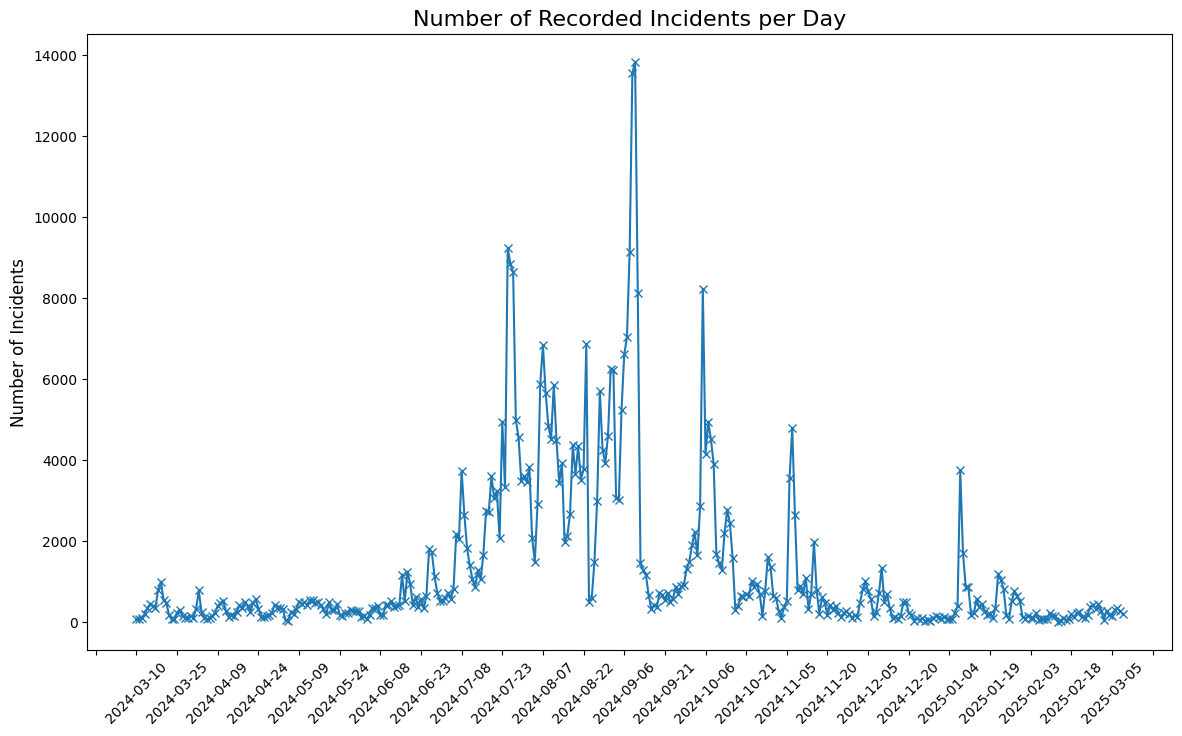

In [ ]:
# plotting data
# number of recorded incidents per day

# count of incidents
incident_count = fire_weather_terrain.groupby('date').size().reset_index()
incident_count.columns = ['date', 'count']

plt.figure(figsize=(14, 8))
plt.plot(incident_count['date'], incident_count['count'], marker='x', linestyle='-')
plt.title('Number of Recorded Incidents per Day', fontsize=16)

# setting major ticks every 15 days
ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(15))

plt.xticks(rotation=45)
plt.ylabel('Number of Incidents', fontsize=12)
plt.show()

In [ ]:
# get a list of all the satellites used for data collection
satellite_list = fire_weather_terrain['satellite'].unique()
print(satellite_list)
# terra and aqua are MODIS satellites, NOAA20 is J1, NOOA21 is j2,

['SUOMI' 'Aqua' 'Terra' 'NOAA-20' 'NOAA-21']


In [ ]:
# count of incidents for all satellites by date
incident_count_by_satellite = fire_weather_terrain.groupby(['date', 'satellite']).size().reset_index()

# Rename columns
incident_count_by_satellite.columns = ['Date', 'Satellite', 'Count']

In [ ]:
# order by date before plotting

incident_count_by_satellite['Date'] = pd.to_datetime(incident_count_by_satellite['Date'])

#order by date after converting the type.
incident_count_by_satellite = incident_count_by_satellite.sort_values(by='Date')


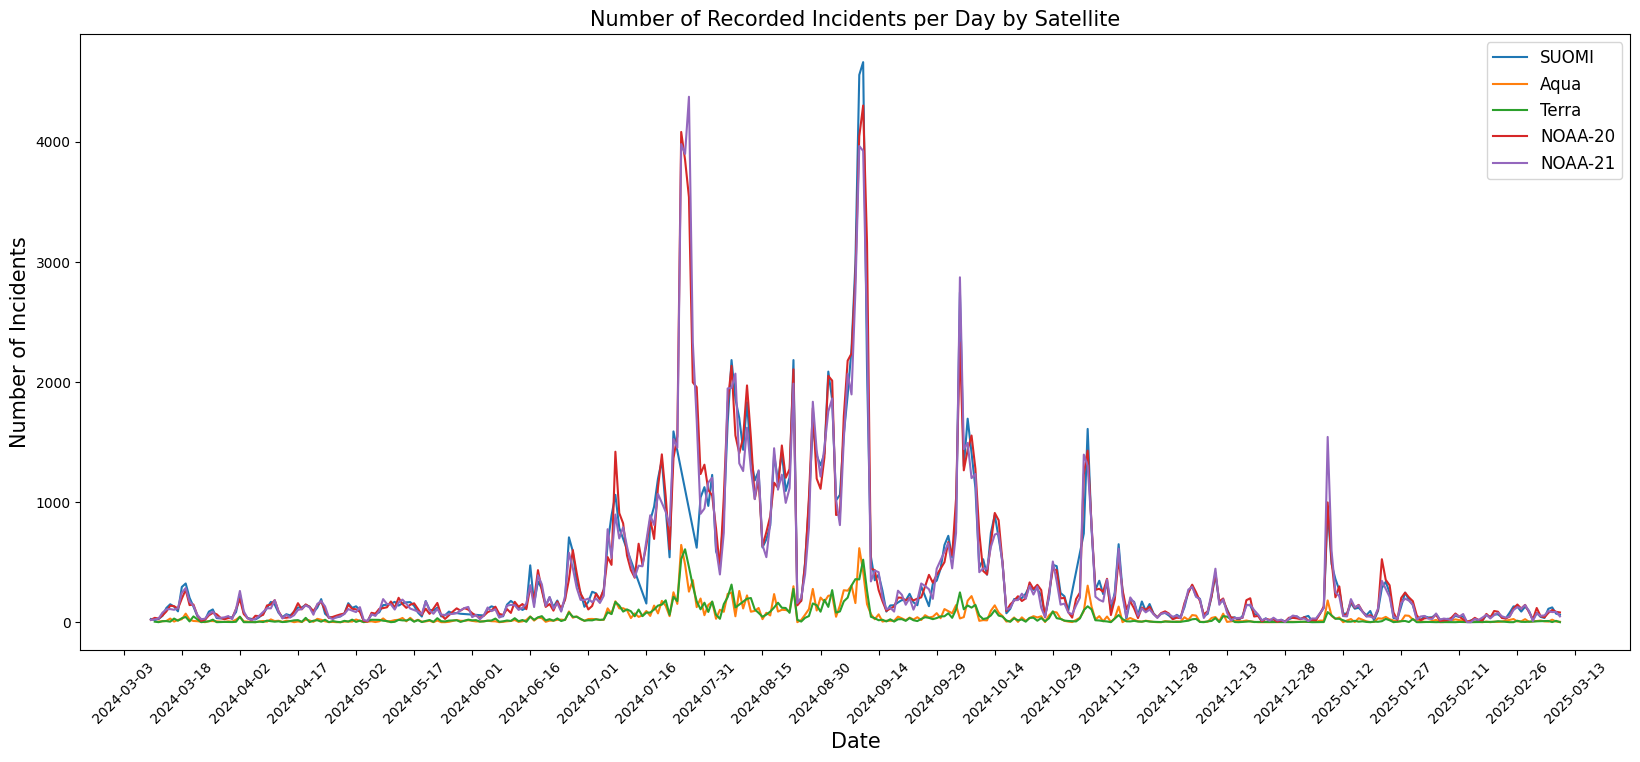

In [ ]:
# plotting the graph
plt.figure(figsize=(20, 8))
for satellite in satellite_list:
    satellite_data = incident_count_by_satellite[incident_count_by_satellite['Satellite'] == satellite]
    plt.plot(satellite_data['Date'], satellite_data['Count'], label=satellite)

plt.title('Number of Recorded Incidents per Day by Satellite', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Incidents', fontsize=15)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(15))
plt.legend(fontsize=12)
plt.show()

In [ ]:
# Create a pie chart which shows the total number of recordings for each satellite
total_incidents = fire_weather_terrain.groupby(['satellite']).size().reset_index()

# rename columns
total_incidents.columns = ['Satellite', 'Count']


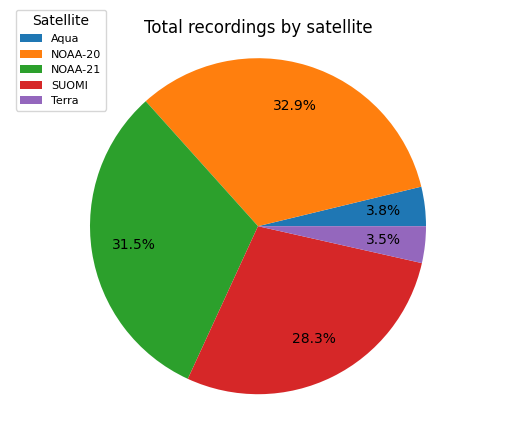

<Figure size 2000x2000 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
plt.figure(figsize=(20, 20))
ax.pie(total_incidents['Count'],  autopct = '%1.1f%%', pctdistance=0.75)
ax.axis('equal')
ax.legend(total_incidents['Satellite'], title = 'Satellite', bbox_to_anchor=(0,1,0.2, 0.1) ,loc = 'upper left',fontsize = '8')
ax.set_title("Total recordings by satellite")
plt.show()

In [ ]:
# plot a bar chart of fire detection by fire type
fire_type_count = fire_weather_terrain.groupby(['type']).size().reset_index()
# rename columns
fire_type_count.columns = ['Fire Type', 'Count']
print(fire_type_count)


                  Fire Type   Count
0         No type available  166414
1        Offshore Detection     291
2  Other Static Land Source   11317
3  Presumed Vegetation Fire  287173


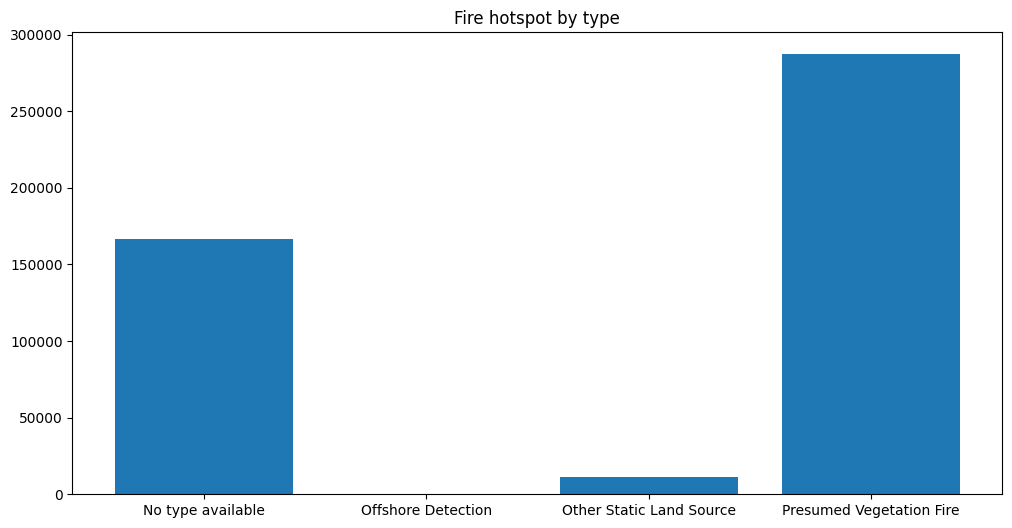

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(fire_type_count['Fire Type'], fire_type_count['Count'])
plt.title("Fire hotspot by type")
plt.show()

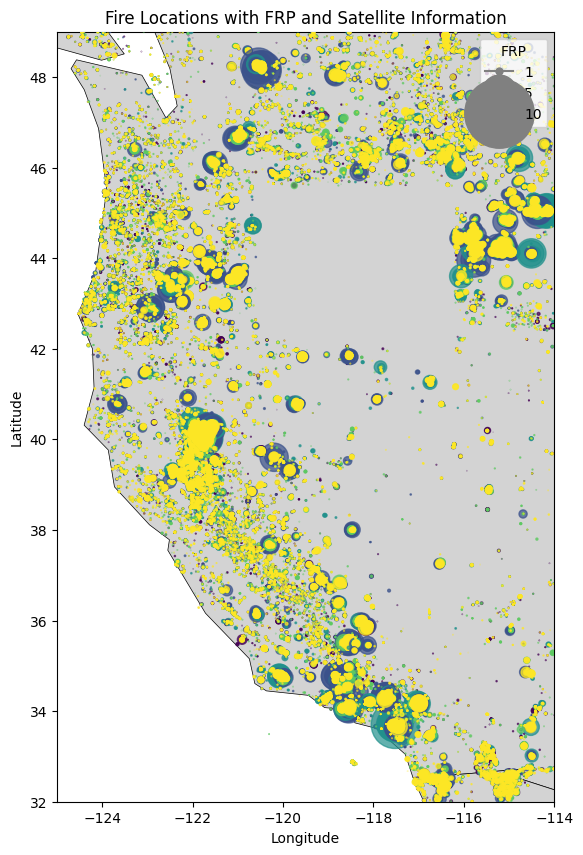

In [ ]:

# Define coordinate range
min_long = -125
max_long = -114
min_lat = 32
max_lat = 49

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 10))


# Load and plot the world map
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
world.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)  # Reduced linewidth


# Define marker sizes based on frp (fire radiative power)
sizes = fire_weather_terrain['frp'] * 0.1  # Adjust the multiplier for better visualization

# Define colors based on satellite
unique_satellites = fire_weather_terrain['satellite'].unique()
colors = plt.cm.viridis(
    np.linspace(0, 1, len(unique_satellites))
)  # Use viridis colormap

satellite_color_map = dict(zip(unique_satellites, colors))
satellite_colors = fire_weather_terrain['satellite'].map(satellite_color_map)

# Create the scatter plot
scatter = ax.scatter(
    fire_weather_terrain['longitude'],
    fire_weather_terrain['latitude'],
    s=sizes,
    c=satellite_colors,
    alpha=0.7,
    zorder=3,
)

# Create the satellite legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
    for satellite, color in satellite_color_map.items()]
ax.legend(handles, satellite_color_map.keys(), title='Satellite', loc='upper left')

# Create the size legend
size_values = [1, 5, 10]  # Example FRP values
size_pixels = [s * 5 for s in size_values]  # Corresponding marker sizes

size_handles = [plt.Line2D([0], [0], marker='o', color='gray', markerfacecolor='gray', markersize=size)
    for size in size_pixels]
size_labels = [str(s) for s in size_values]
ax.legend(size_handles, size_labels, title='FRP', loc='upper right')
 # Added size legend, adjusted location

# Set plot title and labels
plt.title('Fire Locations with FRP and Satellite Information')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set plot limits
ax.set_xlim(min_long, max_long)
ax.set_ylim(min_lat, max_lat)

# Show the plot
plt.show()

In [ ]:
# Plotting a bar chart of fire detections per month
# extracting the month column from the dataframe
fire_weather_terrain['month'] = pd.to_datetime(fire_weather_terrain['date']).dt.month
fire_weather_terrain['year'] = pd.to_datetime(fire_weather_terrain['date']).dt.year

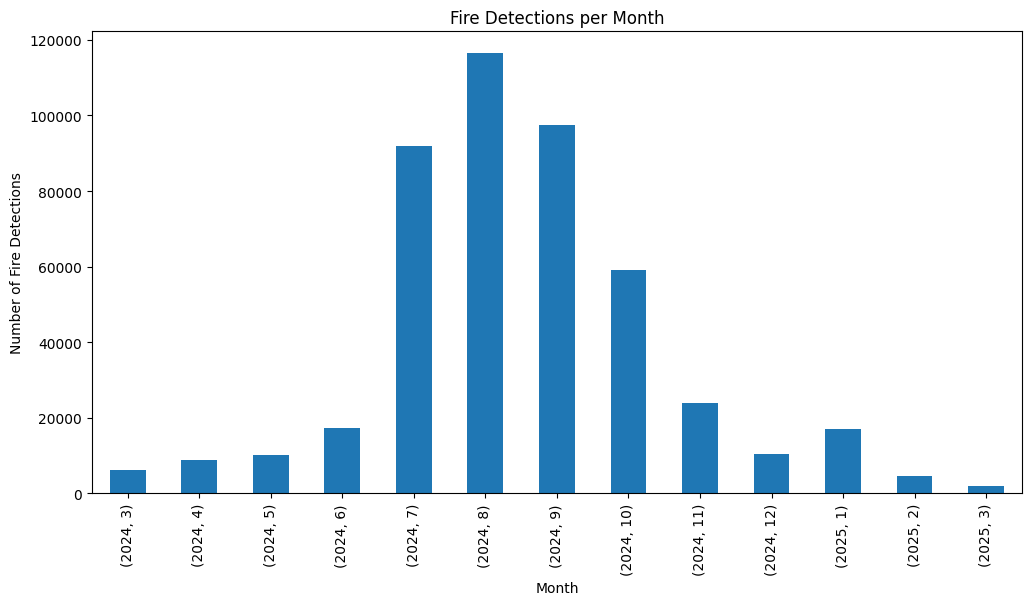

In [ ]:
monthly_fire_counts = fire_weather_terrain.groupby(['year', 'month']).size()

# order by year and month before plotting
monthly_fire_counts = monthly_fire_counts.sort_index()

plt.figure(figsize=(12, 6))
monthly_fire_counts.plot(kind='bar')
plt.title('Fire Detections per Month')
plt.xlabel('Month')
plt.ylabel('Number of Fire Detections')
plt.show()

# The data is from 10st March 2024 until 9th March 2025


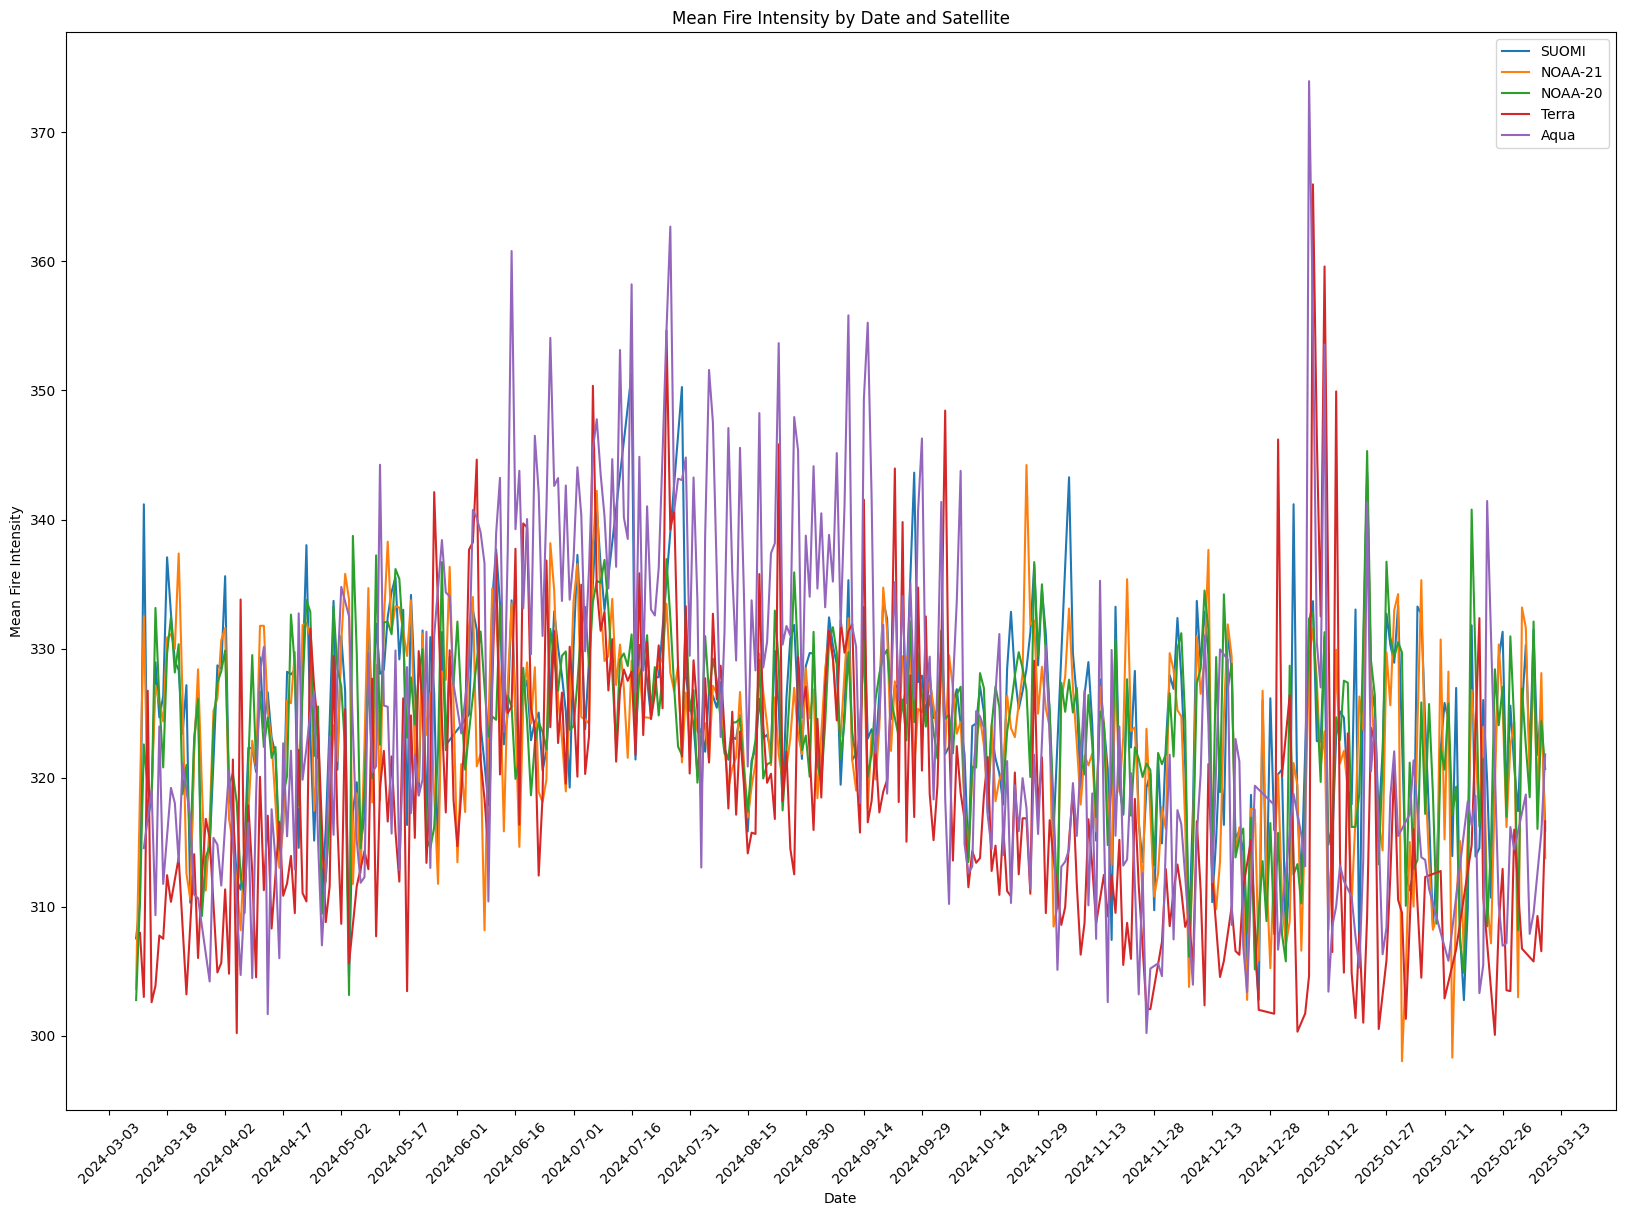

In [ ]:
# Group by satellite, and acquisition date, calculate mean brightness and reset the index
grouped_sat_data = fire_weather_terrain.groupby(['satellite', 'date'])['brightness'].mean().reset_index()

# Create a plot
plt.figure(figsize=(20, 14))

# order by date before plotting
grouped_sat_data['date'] = pd.to_datetime(grouped_sat_data['date'])
grouped_sat_data = grouped_sat_data.sort_values(by='date')

# Loop through each satellite and plot
for satellite in grouped_sat_data['satellite'].unique():
    satellite_data = grouped_sat_data[grouped_sat_data['satellite'] == satellite]
    plt.plot(satellite_data['date'], satellite_data['brightness'], label=satellite)

plt.title('Mean Fire Intensity by Date and Satellite')
plt.xlabel('Date')
plt.ylabel('Mean Fire Intensity')
ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(15))
plt.xticks(rotation = 45)
plt.legend()
plt.show()
# L9 and L8 dont have any data, so they need to be removed


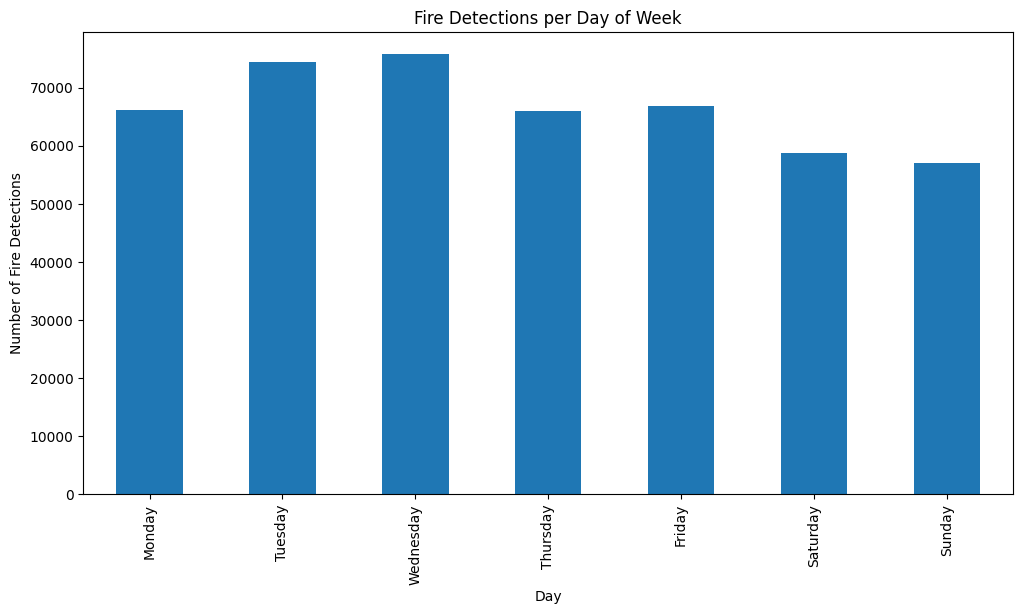

In [ ]:
# fire detections by day of the week
day_fire_counts = fire_weather_terrain.groupby(['day_of_week']).size()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_fire_counts.index = pd.Categorical(day_fire_counts.index, categories=day_order, ordered=True)
day_fire_counts = day_fire_counts.sort_index()

plt.figure(figsize=(12, 6))
day_fire_counts.plot(kind='bar')
plt.title('Fire Detections per Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Fire Detections')
plt.show()

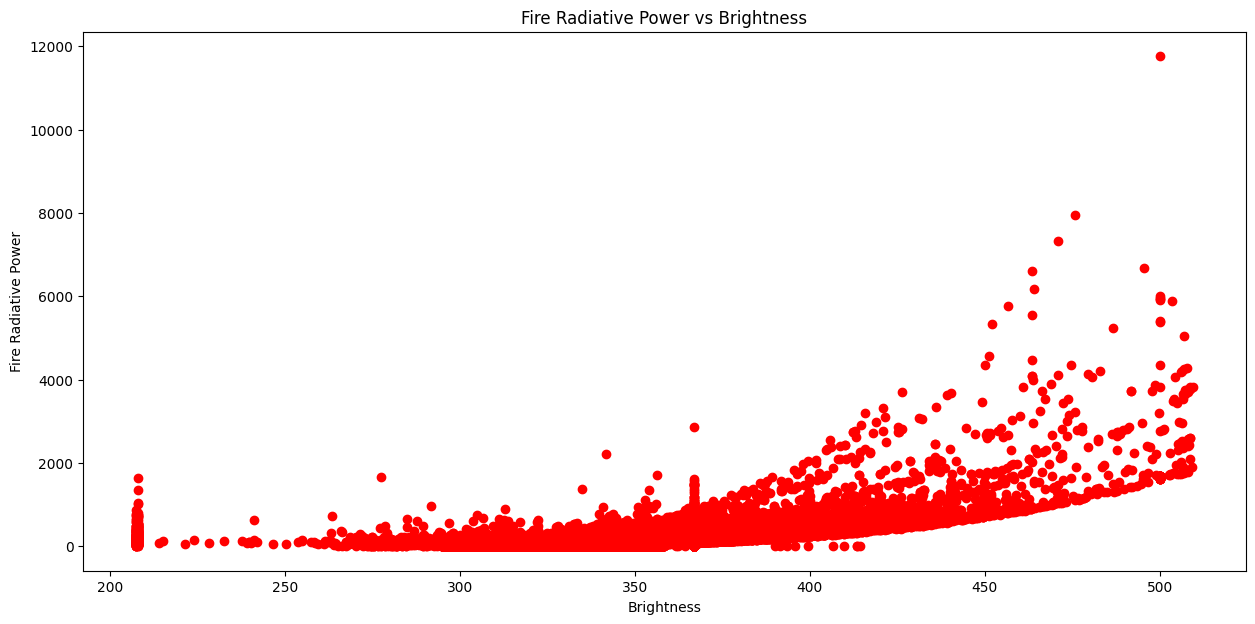

In [ ]:
# plot of fire radiative power vs brightness
plt.figure(figsize=(15, 7))
plt.scatter(fire_weather_terrain['brightness'], fire_weather_terrain['frp'], color='red')
plt.title('Fire Radiative Power vs Brightness')
plt.xlabel('Brightness')
plt.ylabel('Fire Radiative Power')
plt.show()

In [ ]:
# Converting north and eastward wind into a single speed value
fire_weather_terrain['wind_speed'] = np.sqrt(fire_weather_terrain['era5_northward_wind']**2 + fire_weather_terrain['era5_eastward_wind']**2)

In [ ]:
# Calculate the angle of the wind direction, and convert to degrees

fire_weather_terrain['wind_direction'] = np.degrees(np.arctan2(fire_weather_terrain['era5_eastward_wind'], fire_weather_terrain['era5_northward_wind']))
fire_weather_terrain['wind_direction'] = (270 - fire_weather_terrain['wind_direction']) % 360

In [ ]:
# drop the eastward and northward wind columns as these have been converted into a single value of speed and direction
fire_weather_terrain = fire_weather_terrain.drop(['era5_northward_wind', 'era5_eastward_wind'], axis=1)

In [ ]:
fire_weather_terrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465195 entries, 0 to 465194
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   latitude              465195 non-null  float64
 1   longitude             465195 non-null  float64
 2   brightness            465195 non-null  float64
 3   scan                  465195 non-null  float64
 4   track                 465195 non-null  float64
 5   date                  465195 non-null  object 
 6   satellite             465195 non-null  object 
 7   instrument            465195 non-null  object 
 8   confidence            465195 non-null  object 
 9   bright_t31            465195 non-null  float64
 10  frp                   465195 non-null  float64
 11  daynight              465195 non-null  object 
 12  type                  465195 non-null  object 
 13  frp_brightness_ratio  465195 non-null  float64
 14  day_of_week           465195 non-null  object 
 15  

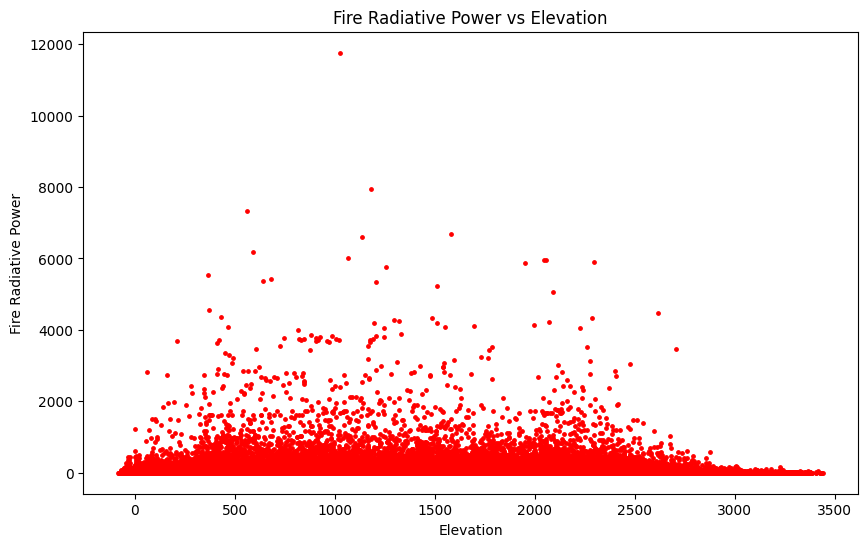

In [ ]:
# Scatter plot of FRP vs elevation
plt.figure(figsize=(10, 6))
plt.scatter(fire_weather_terrain['terrain_elevation'], fire_weather_terrain['frp'], color='red', s=6)
plt.title('Fire Radiative Power vs Elevation')
plt.xlabel('Elevation')
plt.ylabel('Fire Radiative Power')
plt.show()

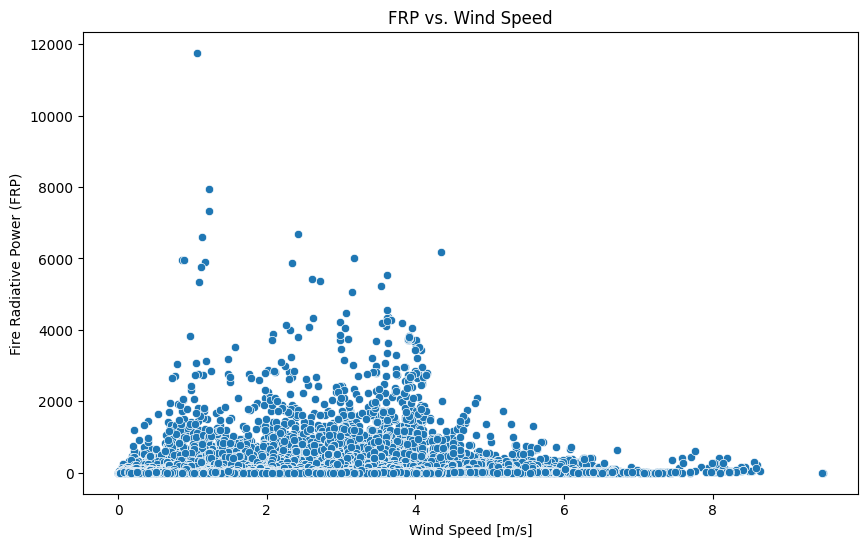

In [ ]:
# Scatter plot of wind speed vs FRP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fire_weather_terrain, x=fire_weather_terrain['wind_speed'], y=fire_weather_terrain['frp'])
plt.title('FRP vs. Wind Speed')
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Fire Radiative Power (FRP)')
plt.show()

# Repeat for 'temperature' and 'wind_direction' (think about how to visualize cyclical direction)


<ipython-input-15-b61a944ab550>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_frp_by_direction = fire_weather_terrain.groupby('wind_direction_category')['frp'].mean().reindex(labels) # Reindex to maintain order


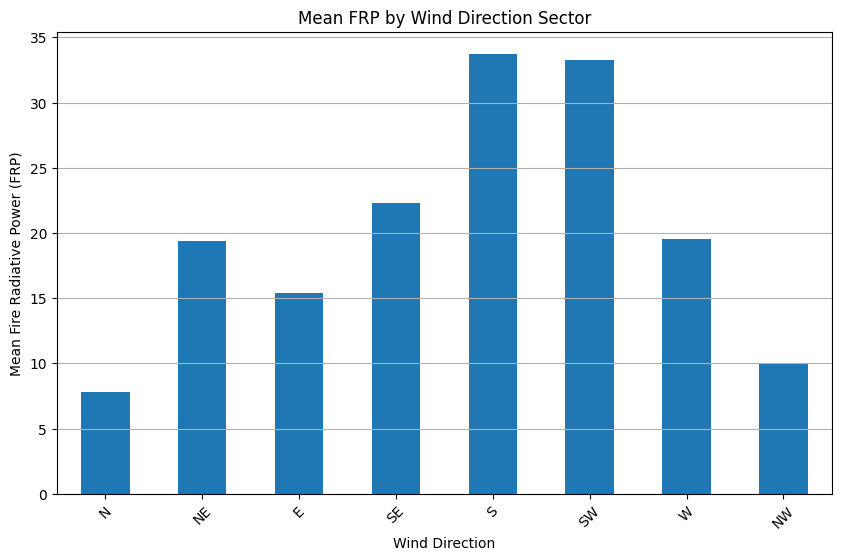

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [0, 45, 90, 135, 180, 225, 270, 315, 360]
labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
fire_weather_terrain['wind_direction_category'] = pd.cut(fire_weather_terrain['wind_direction'], bins=bins, labels=labels, right=False, include_lowest=True)
mean_frp_by_direction = fire_weather_terrain.groupby('wind_direction_category')['frp'].mean().reindex(labels) # Reindex to maintain order

plt.figure(figsize=(10, 6))
mean_frp_by_direction.plot(kind='bar')
plt.xlabel('Wind Direction')
plt.ylabel('Mean Fire Radiative Power (FRP)')
plt.title('Mean FRP by Wind Direction Sector')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

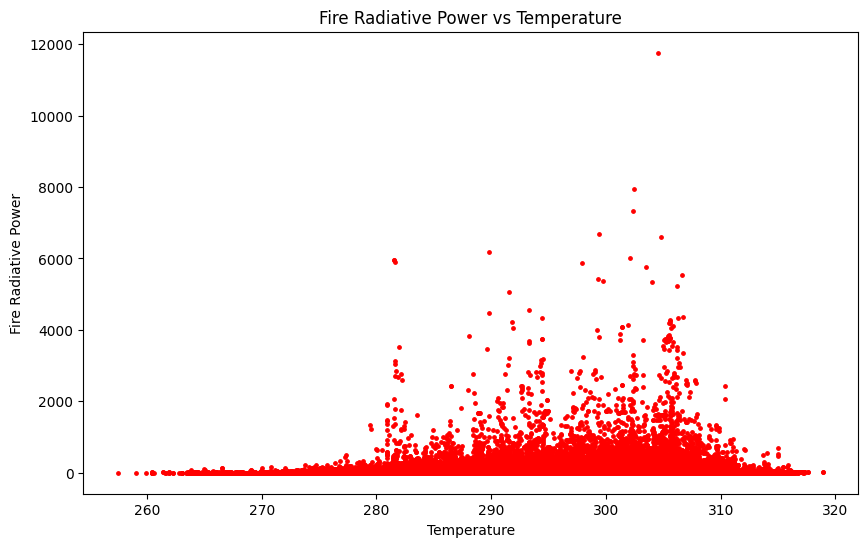

In [ ]:
# plot of FRP vs temperature
plt.figure(figsize=(10, 6))
plt.scatter(fire_weather_terrain['era5_temperature'], fire_weather_terrain['frp'], color='red', s=6)
plt.title('Fire Radiative Power vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Fire Radiative Power')
plt.show()

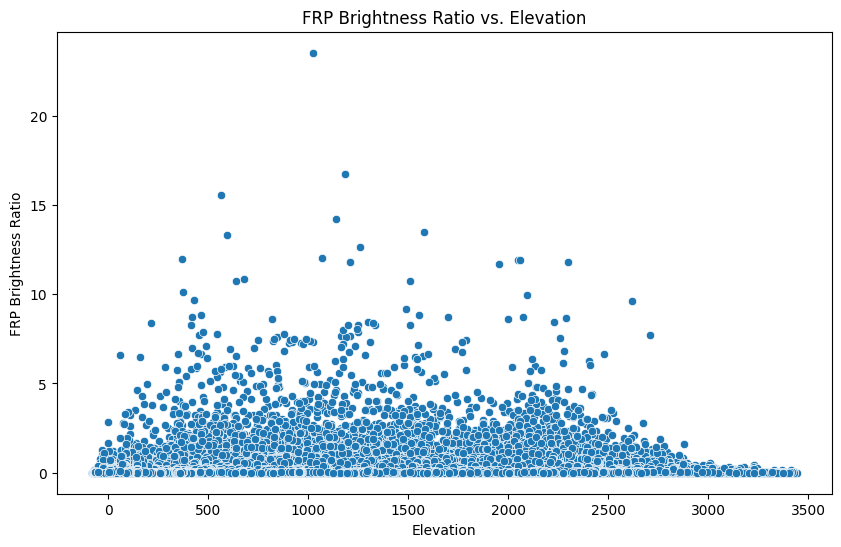

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fire_weather_terrain, x='terrain_elevation', y='frp_brightness_ratio')
plt.title('FRP Brightness Ratio vs. Elevation')
plt.xlabel('Elevation')
plt.ylabel('FRP Brightness Ratio')
plt.show()

# Repeat for other terrain and weather variables

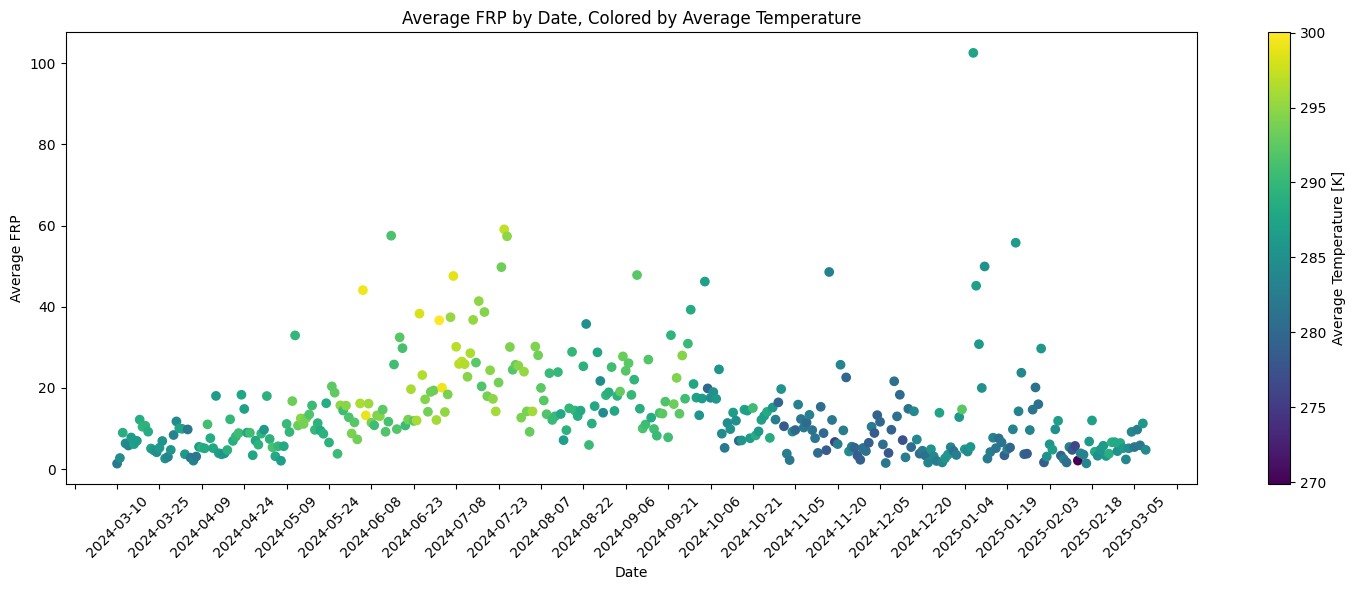

In [ ]:
# Example: Average FRP by date, colored by average temperature
daily_avg = fire_weather_terrain.groupby('date')[['frp', 'era5_temperature']].mean().reset_index()
plt.figure(figsize=(15, 6))
plt.scatter(daily_avg['date'], daily_avg['frp'], c=daily_avg['era5_temperature'], cmap='viridis')
plt.colorbar(label='Average Temperature [K]')
plt.xlabel('Date')
plt.ylabel('Average FRP')
plt.title('Average FRP by Date, Colored by Average Temperature')
ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(15))
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

<ipython-input-35-681d83ea3fad>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fire_counts_by_elevation = fire_weather_terrain.groupby('elevation_bin').size()  # Count occurrences in each bin


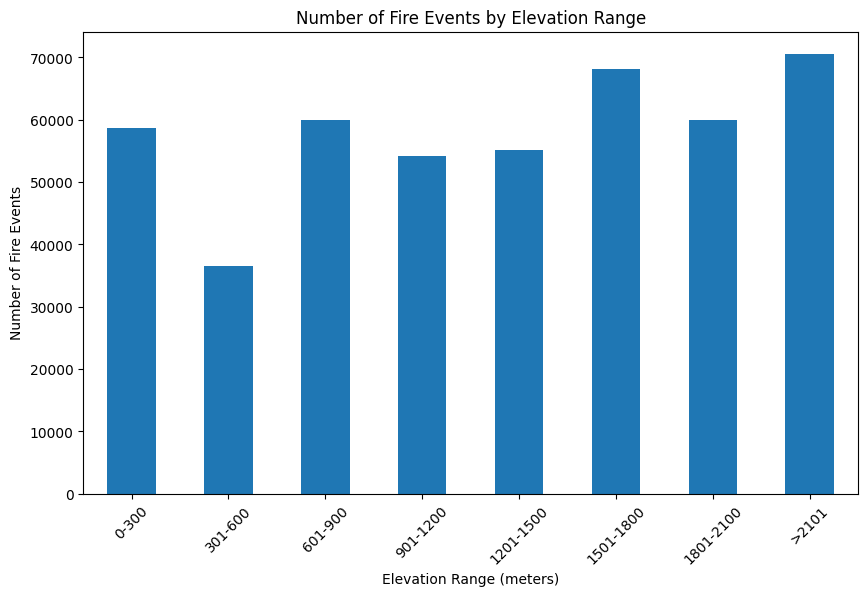

In [ ]:
# Binning Elevation
bins = [0, 300, 600, 900, 1200, 1500, 1800, 2100, fire_weather_terrain['terrain_elevation'].max()]
labels = ['0-300', '301-600', '601-900', '901-1200', '1201-1500', '1501-1800', '1801-2100', '>2101']

fire_weather_terrain['elevation_bin'] = pd.cut(fire_weather_terrain['terrain_elevation'], bins=bins, labels=labels, right=True)

# Counting Fire Events (using frp as a proxy for fire events - you might need a different column if you have event counts)
fire_counts_by_elevation = fire_weather_terrain.groupby('elevation_bin').size()  # Count occurrences in each bin

# Creating the Bar Plot
plt.figure(figsize=(10, 6))
fire_counts_by_elevation.plot(kind='bar') # or sns.barplot(x=fire_counts_by_elevation.index, y=fire_counts_by_elevation.values)
plt.title('Number of Fire Events by Elevation Range')
plt.xlabel('Elevation Range (meters)')
plt.ylabel('Number of Fire Events')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

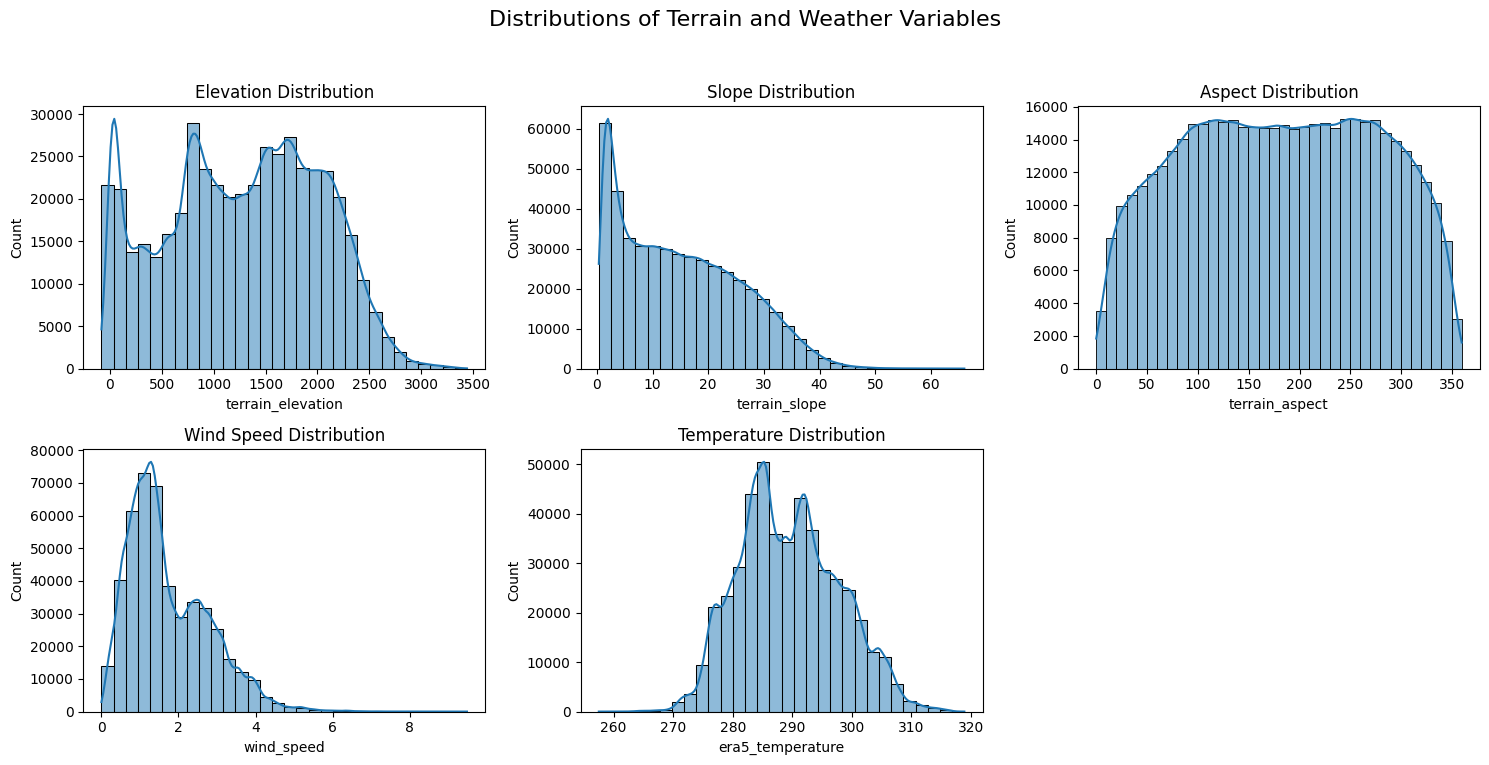

In [ ]:
# Plot of distribution for terrain and weather variables

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Distributions of Terrain and Weather Variables', fontsize=16)

sns.histplot(fire_weather_terrain['terrain_elevation'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Elevation Distribution')

sns.histplot(fire_weather_terrain['terrain_slope'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Slope Distribution')

sns.histplot(fire_weather_terrain['terrain_aspect'], bins=36, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Aspect Distribution')

sns.histplot(fire_weather_terrain['wind_speed'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Wind Speed Distribution')

sns.histplot(fire_weather_terrain['era5_temperature'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Temperature Distribution')

fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

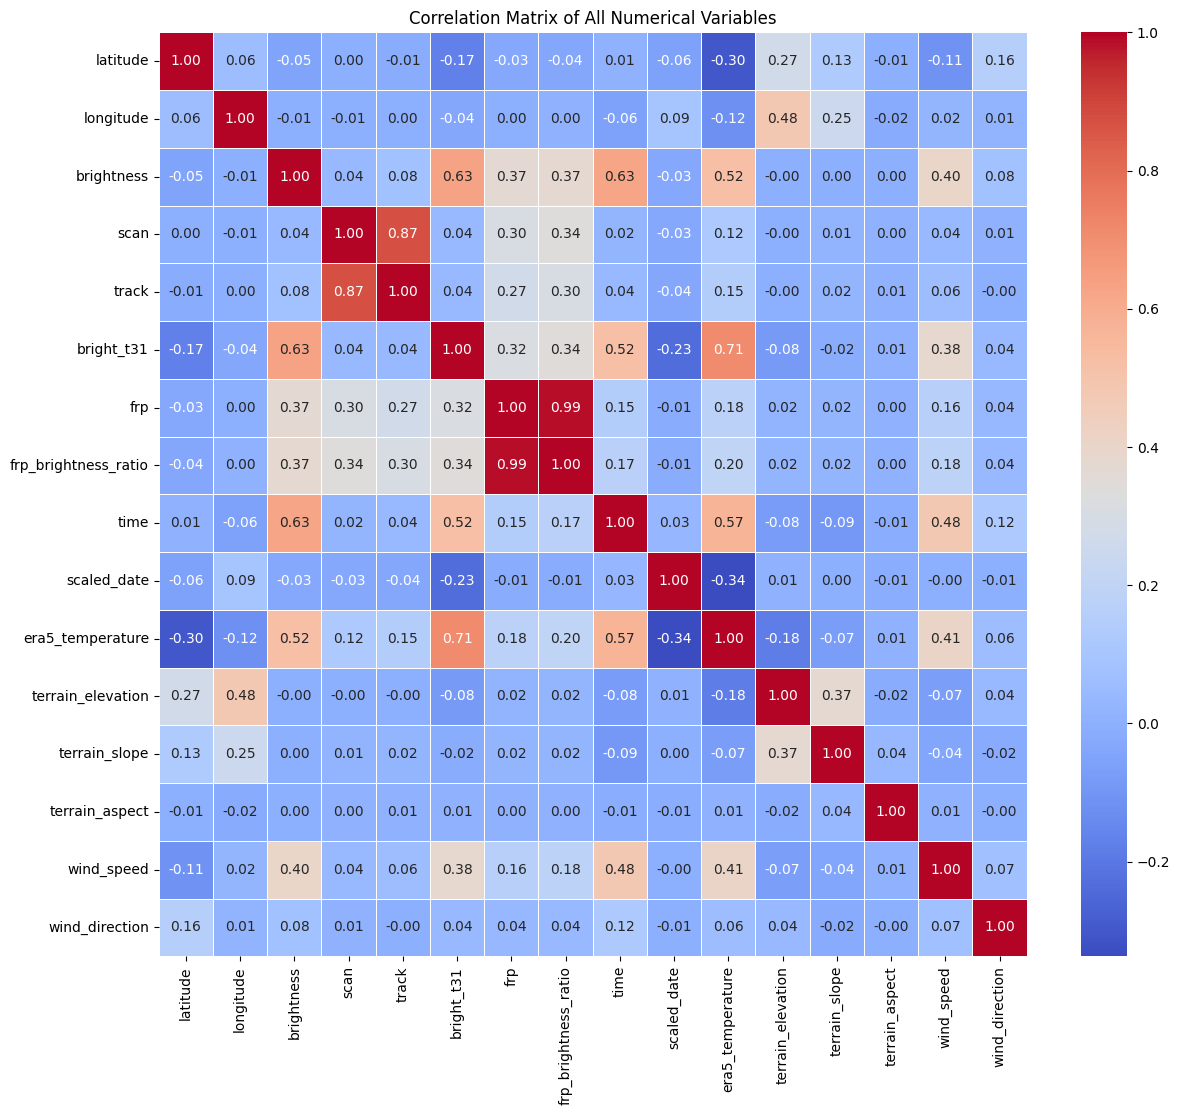

In [ ]:
# Plot a correlation matrix
correlation_matrix = fire_weather_terrain.corr(numeric_only=True)
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Numerical Variables')
plt.show()

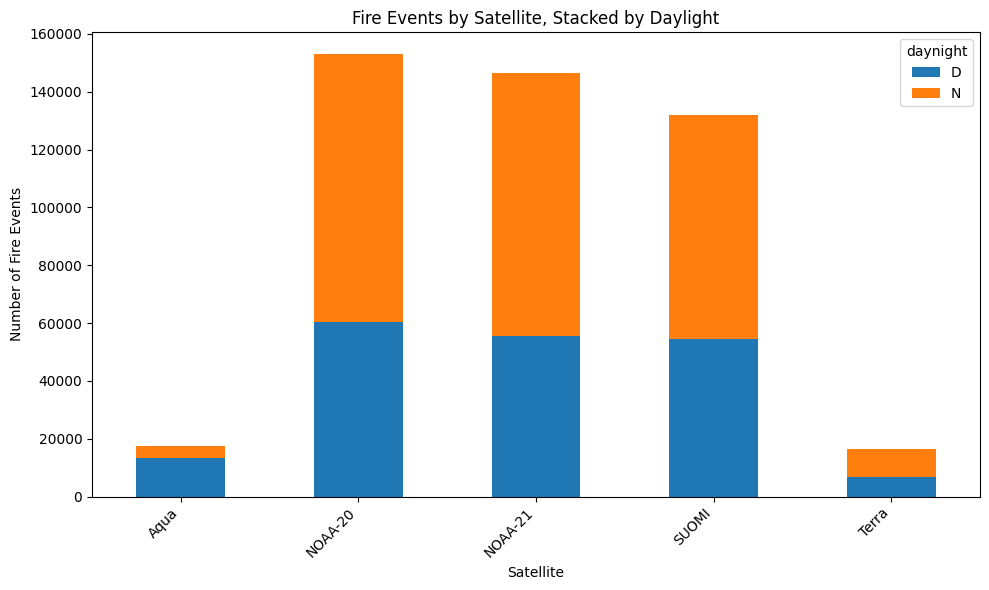

In [ ]:
# Number of fire events by satellite and daynight
cross_tab = pd.crosstab(fire_weather_terrain['satellite'], fire_weather_terrain['daynight'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Fire Events by Satellite, Stacked by Daylight')
plt.xlabel('Satellite')
plt.ylabel('Number of Fire Events')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



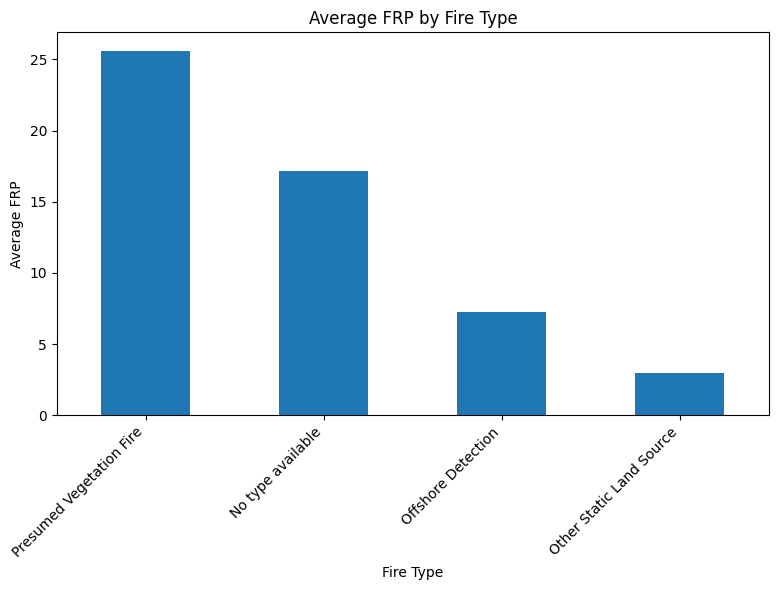

In [ ]:
# Average FRP by fire type
avg_frp_by_type = fire_weather_terrain.groupby('type')['frp'].mean().sort_values(ascending=False)
avg_frp_by_type.plot(kind='bar', figsize=(8, 6))
plt.title('Average FRP by Fire Type')
plt.xlabel('Fire Type')
plt.ylabel('Average FRP')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

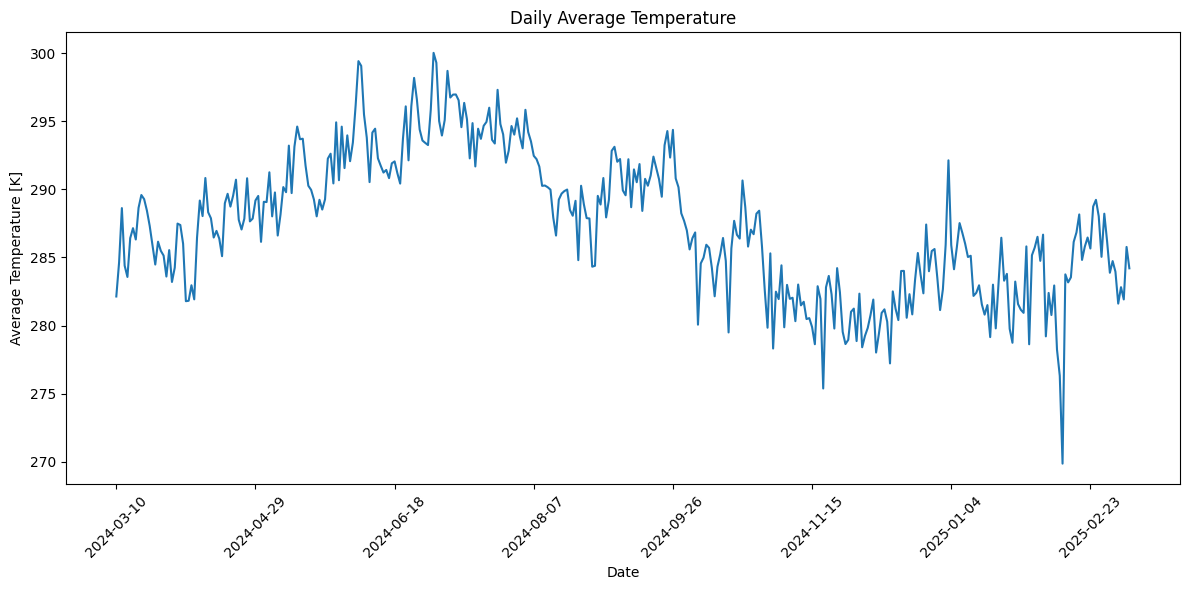

In [ ]:
# Daily average temperature
daily_avg_temp = fire_weather_terrain.groupby(fire_weather_terrain['date'])['era5_temperature'].mean()
plt.figure(figsize=(12, 6))
daily_avg_temp.plot(kind='line')
plt.title('Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature [K]')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



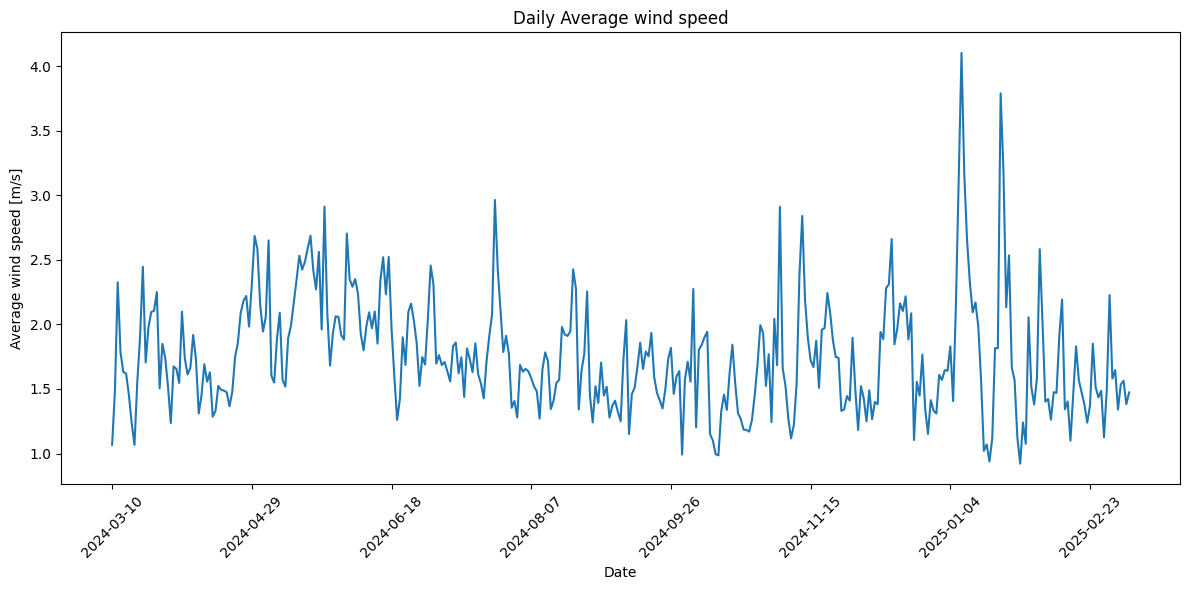

In [ ]:
# Daily average wind speed
daily_avg_temp = fire_weather_terrain.groupby(fire_weather_terrain['date'])['wind_speed'].mean()
plt.figure(figsize=(12, 6))
daily_avg_temp.plot(kind='line')
plt.title('Daily Average wind speed')
plt.xlabel('Date')
plt.ylabel('Average wind speed [m/s]')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
# Save the dataset as a csv
fire_weather_terrain.to_csv('/content/drive/MyDrive/0.Data science final project/5. Fire weather terrain combined/fire_weather_terrain_final.csv', index=False)